# PROJEKT 3: PAARWEISE SEQUENZALIGNMENTS

## Name: Dang Quynh Tram Nguyen

**Implementation**

In [1]:
#2D-Arrays mit Länge von Sequenz 2

#Initialiesierung der Substitutionsmatrix für glokale Alignment
def matrix(seq1,seq2):
    matrix = [[0 for j in range(len(seq1))] for i in range(len(seq2))]
    return matrix
    
#Initialisierung der Traceback-Matrix
def traceback(seq1,seq2):
    traceback = [["" for j in range(len(seq1))] for i in range(len(seq2))]
    return traceback

Zusätzliche Funktionen

In [2]:
#Setzt Traceback-Map

def set_traceback(dia,ver,hor):
    m = max(dia,ver,hor)
    if m == dia: return "dia"
    if m == ver: return "ver"
    else: return "hor"

In [3]:
def get_traceback(seq1,seq2,traceback):
    s1_alg = ""
    s2_alg = ""
    
    i = len(seq2)-1
    j = len(seq1)-1
    while i > 0 and j > 0:
        if traceback[i][j] == "dia":
            s1_alg = seq1[j] + s1_alg
            s2_alg = seq2[i] + s2_alg
            i -= 1 ; j -= 1
        elif traceback[i][j] == "ver":
            s1_alg = "-" + s1_alg
            s2_alg = seq2[i] + s2_alg
            i -= 1
        elif traceback[i][j] == "hor":
            s1_alg = seq1[j] + s1_alg
            s2_alg = "-" + s2_alg
            j -= 1
    #Für die letzten Gaps
    while i > 0:
        s1_alg = "-" + s1_alg
        s2_alg = seq2[i] + s2_alg
        i -= 1
    while j > 0:
        s1_alg = seq1[j] + s1_alg
        s2_alg = "-" + s2_alg
        j -= 1
    
    return([s1_alg,s2_alg])

def get_alig(s1_alg,s2_alg):
    i = 0
    while i < len(s1_alg)/100:
        print('{}\n{}\n'.format(s1_alg[i*100:(i+1)*100],s2_alg[i*100:(i+1)*100]))
        i += 1
    #print(s1_alg)
    #print(s2_alg)

Needleman-Wunsch-Algorithmus

In [4]:
def needleman_wunsch(seq1,seq2,sub_matrix,gap_penalty):
    t = traceback(seq1,seq2)
    m = matrix(seq1,seq2)
    
    assert gap_penalty <= 0, 'gap_penalty sollte kleiner oder gleich 0 sein'
    assert seq1[0] == "-" and seq2[0] == "-"
    
    #Initialisierung
    for i in range(len(seq2)):
        m[i][0] = i*gap_penalty
    for j in range(len(seq1)):
        m[0][j] = j*gap_penalty
    #Beste Score und Beste Alignment

    for i in range(1,len(seq2)):
        for j in range(1,len(seq1)):
            ver = m[i-1][j] + gap_penalty
            hor = m[i][j-1] + gap_penalty
            dia = m[i-1][j-1] + sub_matrix[seq1[j]+seq2[i]]
            
            m[i][j] = max(dia,ver,hor)
            t[i][j] = set_traceback(dia,ver,hor)
    
    k = m[len(seq2)-1][len(seq1)-1] #Bestes Score
    
    return list([m, t, k])

Smith-Waterman-Algorithmus

In [5]:
def smith_waterman(seq1,seq2,sub_matrix,gap_penalty):
    t = traceback(seq1,seq2)
    m = matrix(seq1,seq2)
    assert gap_penalty <= 0, 'gap_penalty sollte kleiner oder gleich 0 sein'
    assert seq1[0] == "-" and seq2[0] == "-"

    #Initialisierung
    for i in range(len(seq2)):
        m[i][0] = 0
    for j in range(len(seq1)):
        m[0][j] = 0
    
    #Beste Score und Beste Alignment
    k = 0 #best score
    k_pos = []
    
    for i in range(1,len(seq2)):
        for j in range(1,len(seq1)):
            ver = m[i-1][j] + gap_penalty
            hor = m[i][j-1] + gap_penalty
            dia = m[i-1][j-1] + sub_matrix[seq1[j]+seq2[i]]
            
            m[i][j] = max(dia,ver,hor,0)
            t[i][j] = set_traceback(dia,ver,hor)
            
            if k < m[i][j]: 
                k = m[i][j]
                k_pos = [i,j]
    
    return list([m, t, k, k_pos])  

**Testen mit Onkogene des Menschen und der Maus**

In [6]:
#Erzeugen einer Liste der Sequenz(-en) in einem File
def seq(fasta_file):
    read_file = fasta_file.readlines()
    list_seqfile = []
    for i in read_file:
        i = i.strip("\n")
        if len(i) > 0:
            if i[0] == ">": 
                list_seqfile.append(i)
                list_seqfile.append("-")
            else:
                list_seqfile[-1] += i
            
    return list_seqfile

In [7]:
# Substitutionsmatrix für 4 Nukleotiden A,T,G,C
sub_nu = dict()
nu = ["A","T","G","C"]
for n1 in nu:
    for n2 in nu:
        if n2 == n1: sub_nu[n1+n2] = 2
        else: sub_nu[n1+n2] = 0

In [8]:
#Test durchführen
ls1 = seq(open("NM_004985.3.fasta","r"))

ls2 = seq(open("NM_021284.7.fasta","r"))

s1 = ls1[1] #Onkogen KRAS des Menschen
s2 = ls2[1] #Onkogen KRAS der Maus
gap = -1

In [9]:
print("Best Alignment vom Needleman-Wunsch")
needle_on = needleman_wunsch(s1,s2,sub_nu,gap)
tb_ne = get_traceback(s1,s2,needle_on[1])
get_alig(tb_ne[0],tb_ne[1])

print("Best Alignment vom Smith-Waterman")
smith_on = smith_waterman(s1,s2,sub_nu,gap)
tb_sm = get_traceback(s1,s2,smith_on[1])
get_alig(tb_sm[0],tb_sm[1])

Best Alignment vom Needleman-Wunsch
-----GGC---C-GC-G--GCGGC-G--GAGGCAGCAGCG--GCGGCGGCAG-TG-G-CGGC-GGCGAAGGTGGCGGCGGCTCGGCCAGTACTCCCG-GC
GATTCGGCAGGCGGCGGCCGCGGCGGCTGAGGCGGCAGCGCTGTGGCGGCGGCTGAGACGGCAGGGGAAGGCGGCGGCGGCTCGGCCCGGAGTCCCGCTC

CCCCGCCATTTCGGACTGGGAGCGAGCGCGGCGCAGGCACTGAAGGCGGCGGCGGG-GCCAGAGGCTCAGCGGCTCCCAGGTGCGGGAGAGAGGCCTGCT
CCGCGCCATTTCGGACCCGGAGCGAGCGCGGCGCGGGC-CTGAAGGCGGCGGCGGGAGCCTGAGGCGCGGCGGCTCCGCGGCGC-GGAGAGAGGCCTGCT

GAAAATGACTGAATATAAACTTGTGGTAGTTGGAGCTGGTGGCGTAGGCAAGAGTGCCTTGACGATACAGCTAATTCAGAATCATTTTGTGGACGAATAT
GAAAATGACTGAGTATAAACTTGTGGTGGTTGGAGCTGGTGGCGTAGGCAAGAGCGCCTTGACGATACAGCTAATTCAGAATCACTTTGTGGATGAGTAT

GATCCAACAATAGAGGATTCCTACAGGAAGCAAGTAGTAATTGATGGAGAAACCTGTCTCTTGGATATTCTCGACACAGCAGGTCAAGAGGAGTACAGTG
GACCCTACGATAGAGGACTCCTACAGGAAACAAGTAGTAATTGATGGAGAAACCTGTCTCTTGGATATTCTCGACACAGCAGGTCAAGAGGAGTACAGTG

CAATGAGGGACCAGTACATGAGGACTGGGGAGGGCTTTCTTTGTGTATTTGCCATAAATAATACTAAATCATTTGAAGATATTCACCATTATAGAGAACA
CAATGAGGGACCAGTACATGAGAACTGGGGAGGGCTTTCTTTGTGTATTTG

---------------GGCCGCGGCGGCGGAGGCAGCAGCG--GCGGCGGCAG-TG-G-CGGC-GGCGAAGGTGGCGGCGGCTCGGCCAGTACTCCCG-GC
GATTCGGCAGGCGGCGGCCGCGGCGGCTGAGGCGGCAGCGCTGTGGCGGCGGCTGAGACGGCAGGGGAAGGCGGCGGCGGCTCGGCCCGGAGTCCCGCTC

CCCCGCCATTTCGGACTGGGAGCGAGCGCGGCGCAGGCACTGAAGGCGGCGGCGGG-GCCAGAGGCTCAGCGGCTCCCAGGTGCGGGAGAGAGGCCTGCT
CCGCGCCATTTCGGACCCGGAGCGAGCGCGGCGCGGGC-CTGAAGGCGGCGGCGGGAGCCTGAGGCGCGGCGGCTCCGCGGCGC-GGAGAGAGGCCTGCT

GAAAATGACTGAATATAAACTTGTGGTAGTTGGAGCTGGTGGCGTAGGCAAGAGTGCCTTGACGATACAGCTAATTCAGAATCATTTTGTGGACGAATAT
GAAAATGACTGAGTATAAACTTGTGGTGGTTGGAGCTGGTGGCGTAGGCAAGAGCGCCTTGACGATACAGCTAATTCAGAATCACTTTGTGGATGAGTAT

GATCCAACAATAGAGGATTCCTACAGGAAGCAAGTAGTAATTGATGGAGAAACCTGTCTCTTGGATATTCTCGACACAGCAGGTCAAGAGGAGTACAGTG
GACCCTACGATAGAGGACTCCTACAGGAAACAAGTAGTAATTGATGGAGAAACCTGTCTCTTGGATATTCTCGACACAGCAGGTCAAGAGGAGTACAGTG

CAATGAGGGACCAGTACATGAGGACTGGGGAGGGCTTTCTTTGTGTATTTGCCATAAATAATACTAAATCATTTGAAGATATTCACCATTATAGAGAACA
CAATGAGGGACCAGTACATGAGAACTGGGGAGGGCTTTCTTTGTGTATTTGCCATAAATAATACTAAATCATTTGAAGATATTCACC

In [10]:
# Sequenzidentität
def identisch(s1_alg,s2_alg):
    i = 0
    for e in range(len(s1_alg)):
        if s1_alg[e] == s2_alg[e]: i += 1
    return round(i/len(s1_alg)*100,2)

In [11]:
print("Sequenidentität im eigene Alignment")
print("NW:",identisch(tb_ne[0],tb_ne[1]),"%")
print("SW:",identisch(tb_sm[0],tb_sm[1]),"%")

Sequenidentität im eigene Alignment
NW: 68.74 %
SW: 68.72 %


In [12]:
#Scores-Vergleich
print("Score")
print("NW:",needle_on[2])
print("SW:",smith_on[2])

Score
NW: 6568
SW: 6594


In [13]:
#Vergleich genereller Strukturen
print("Länge der selben Alginment-Sequenz: NW ~ SW")
print("seq1",len(tb_ne[0]),"~",len(tb_sm[0]))
print("seq2",len(tb_ne[1]),"~",len(tb_sm[1]))
print("Identität der selben Sequenz in beiden Alginments")
print("seq1",identisch(tb_ne[0],tb_sm[0]),"%")
print("seq2",identisch(tb_ne[1],tb_sm[1]),"%")

Länge der selben Alginment-Sequenz: NW ~ SW
seq1 5467 ~ 5467
seq2 5467 ~ 5467
Identität der selben Sequenz in beiden Alginments
seq1 99.78 %
seq2 100.0 %


**Signifikanz der Ähnlichkeit**

In [14]:
import blosum as bl
b = bl.BLOSUM(62)
blosum62 = dict(b)

TRA-2-Sequenz in PTCH2 (PTCH2_TRA2.fasta)

In [15]:
#Sequenzen bestimmen
ls3 = seq(open("PTCH2_TRA2.fasta","r"))
ptch2 = ls3[1]
tra2 = ls3[3]
gap = -5

#Alignment
print("TRA2 in PTCH2")
print("Best Alignment vom Needleman-Wunsch")
needle_pt = needleman_wunsch(ptch2,tra2,blosum62,gap)
tb_ne1 = get_traceback(ptch2,tra2,needle_pt[1])
get_alig(tb_ne1[0],tb_ne1[1])

print("Best Alignment vom Smith-Waterman")
smith_pt = smith_waterman(ptch2,tra2,blosum62,gap)
tb_sm1 = get_traceback(ptch2,tra2,smith_pt[1])
get_alig(tb_sm1[0],tb_sm1[1])

TRA2 in PTCH2
Best Alignment vom Needleman-Wunsch
MTRSPPLRELPPSYTPPARTAAPQILAGSLKAPLWLRAYFQGLLFSLGCGIQRHCGKVLFLGLLAFGALALGLRMAIIETNLEQLWVEVGSRVSQELHYT
M-KL-KYNKLLVSVV-IV-T-F--VTFG-L---L-LAECF-G-K-SIDYQ-EKSIFP-SFVS-QGFFETRTNNEEYIIE-KIAQT-QENGVDMRSTLHFT

KEKLGEEAAYTSQMLIQTARQEGENILTPEALGLHLQAALTASKVQVSLYGKSWDLNKICYKSGVPLIENGMIERMIEKLFPCVILTPLDCFWEGAKLQG
-QH-GYLLNNISNLKIK-FRQK-TYTLN-D-V-C-FKPHITIFQ-Q-S--SSS-DQNE--YPH---YIQRLLLE-M-QRLSPCLIVTPLNCFYDIYRIH-

GSAYLPGRPDIQWTNLDPEQLLEELGPFASLEGFRELLDKAQVGQAYVGRPCLHPDDLHCPPSAPNHHSRQAPNVAHELSGGCHGFSHKFMHWQEELLLG
GE--I-S--N--W-NKNTDFLNRRLRN-SYIEAIGE-ND--E--RPYV-KSNYGP-SL-I-KSWAD-HMFDLPSKSFTNSTK-DALFQKIKLW----LL-

GMARDPQGELLRAEALQSTFLLMSPRQLYEHFRGDYQTHDIGWSEEQASTVLQAWQRRFVQLAQEALPENASQQIHAFSSTTLDDILHAFSEVSAARVVG
SI--EPRQKTC-AASIHSCDTPLDSEH-YFNICTDMQSVD-NFAEKKTKFKLEDVDEEFA-MNLDCV-DDQEQFIE-WMQ-EL-EIRKMYSHVT-EK--P

GYLLMLAYACVTMLRWDCAQSQGSVGLAGVLLVALAVASGLG-L-CALLGIT--FNAATTQVLPFL-AL-GI-GVDDVFLLAHAFTEAL-PGT-PLQE-R
DYPNVVNQTCDKIFH-D-LNSTGIEFFDGSRSFS-ST

TRA-2-Sequenz im Eyeless-Protein (Eyeless_Tra.fasta)

In [16]:
#Sequenzen bestimmen
ls4 = seq(open("Eyeless_Tra.fasta","r"))
ey = ls4[1]
tra = ls4[3]
gap = -5

#Alignment
print("TRA2 in Eyeless")
print("Best Alignment vom Needleman-Wunsch")
needle_ey = needleman_wunsch(ey,tra,blosum62,gap)
tb_ne2 = get_traceback(ey,tra,needle_ey[1])
get_alig(tb_ne2[0],tb_ne2[1])

print("Best Alignment vom Smith-Waterman")
smith_ey = smith_waterman(ey,tra,blosum62,gap)
tb_sm2 = get_traceback(ey,tra,smith_ey[1])
get_alig(tb_sm2[0],tb_sm2[1])

TRA2 in Eyeless
Best Alignment vom Needleman-Wunsch
MFTLQPTPTAIGTVVPPW-SAGTLI-ERL-PSLEDMAHKG-H-SGVNQLGGVFVGGRPLPDSTRQKIVELAHSGA--R-PCDISR---IL-QVSNGCVSK
M-KLKYNKLLVSVVIVTFVTFGLLLAECFGKSI-DYQEKSIFPSFVSQ--GFFETRTNNEEYIIEKIAQTQENGVDMRSTLHFTQHGYLLNNISNLKI-K

ILGRYYETGSI--RPR-AI---GGSKPRVATAEVVSK-ISQYKR-E-C----P-SIF--AWEIRDRL--LQENV-CTNDNI-PS-VSSI--N--R-VLR-
FRQKTYTLNDVCFKPHITIFQQSSSSDQNEYPHYIQRLLLEMQRLSPCLIVTPLNCFYDIYRIHGEISNWNKNTDFLNRRLRNSYIEAIGENDERPYVKS

NLA-AQ-KE--QQSTGSGSSS-T-SAGNSISAKVS---VSIGGNVSN-VAS-GSRGT-L-SS---S--TDL--MQT-A---T--PLNSSESGGASNSGEG
NYGPSLIKSWADHMFDLPSKSFTNSTKDALFQKIKLWLLSIEPRQKTCAASIHSCDTPLDSEHYFNICTDMQSVDNFAEKKTKFKLEDVDEEFAMNLDCV

SEQEA-I-Y-EKLRLLNT-QHAA-GPG-P--L-EPA-RA-APL--VG-Q----SPNHLGTRSS-HP-Q--LV-HGNHQAL--QQH-Q--Q--QS-WP-PR
DDQEQFIEWMQELEIRKMYSHVTEKPDYPNVVNQTCDKIFHDLNSTGIEFFDGSRSFSSTKSQFDTMQTEIVLLTPEMLLSAMQHSDFVNGFESIWTIEK

-----H-Y--S---GS-WYPTS-LSE-IPISS-A-PN-IAS-VTAYASGPSL-----AHSLSP-PNDI-E-S---LAS--IGHQRN---C---P-V-ATE
AEELIHEFRLALKEETEKFKENRMSKMIRVTSRVL

In [17]:
tra == tra2 
#Behalten Sequenz tra/tra2 und Permutieren der andere Sequenzen

True

Zufall-Alignments mit Needleman-Wunsch-Algorithmus

In [18]:
import random as rd

def zufall(s1,s2):
    c = 500
    s1_li = rd.sample(s1[1:],len(s1)-1)
    lscores = []

    while c > 0:
        new_s1 = "-"
        rd.shuffle(s1_li)
        for i in s1_li:
            new_s1 += i
        ne = needleman_wunsch(new_s1,s2,blosum62,gap)
        lscores.append(ne[2])
        c -= 1

    return lscores

Zufall-Alignments mit Smith-Waterman-Algorithmus

In [19]:
def zufall2(s1,s2):
    c = 500
    s1_li = rd.sample(s1[1:],len(s1)-1)
    lscores = []

    while c > 0:
        new_s1 = "-"
        rd.shuffle(s1_li)
        for i in s1_li:
            new_s1 += i
        sm = smith_waterman(new_s1,s2,blosum62,gap)
        lscores.append(sm[2])
        c -= 1

    return lscores

Wahrscheinlichkeit, ein Alignment mit einem Score ≥ demScore des Alignments mit den originalen Sequenzen

In [20]:
def wahrsch(ori_sc,lscores):
    count = 0
    for s in lscores:
        if s >= ori_sc: count += 1
    return count/len(lscores)

- Permutierte PTCH2 und TRA2

a) Needleman-Wunsch-Algorithmus

In [21]:
import timeit
start = timeit.default_timer()
sc_pt = zufall(ptch2,tra2)
ende = timeit.default_timer()
print("Time",ende-start)
print(sc_pt)

Time 523.2936519020004
[-262.0, -167.0, -162.0, -179.0, -226.0, -231.0, -238.0, -194.0, -118.0, -200.0, -201.0, -272.0, -219.0, -266.0, -224.0, -154.0, -209.0, -267.0, -198.0, -208.0, -184.0, -207.0, -239.0, -163.0, -203.0, -232.0, -215.0, -178.0, -230.0, -222.0, -235.0, -197.0, -300.0, -197.0, -188.0, -246.0, -115.0, -237.0, -135.0, -227.0, -211.0, -221.0, -234.0, -160.0, -246.0, -230.0, -208.0, -232.0, -202.0, -228.0, -229.0, -211.0, -192.0, -149.0, -232.0, -218.0, -111.0, -272.0, -253.0, -178.0, -225.0, -201.0, -160.0, -228.0, -266.0, -216.0, -235.0, -188.0, -269.0, -197.0, -179.0, -195.0, -211.0, -238.0, -279.0, -222.0, -236.0, -198.0, -188.0, -253.0, -202.0, -179.0, -211.0, -206.0, -200.0, -201.0, -210.0, -170.0, -208.0, -239.0, -239.0, -168.0, -163.0, -160.0, -247.0, -186.0, -205.0, -186.0, -205.0, -208.0, -208.0, -214.0, -190.0, -196.0, -180.0, -244.0, -187.0, -255.0, -239.0, -209.0, -167.0, -260.0, -188.0, -199.0, -177.0, -191.0, -170.0, -243.0, -210.0, -199.0, -232.0, -183.0, 

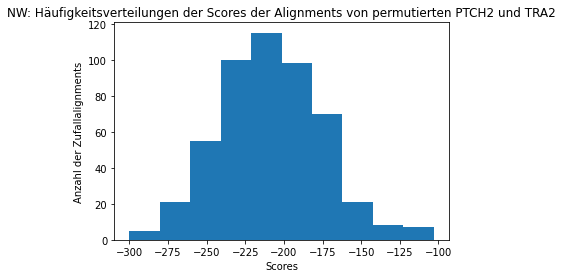

In [22]:
import matplotlib.pyplot as plt
plt.title("NW: Häufigkeitsverteilungen der Scores der Alignments von permutierten PTCH2 und TRA2")
plt.xlabel("Scores")
plt.ylabel("Anzahl der Zufallalignments")
plt.hist(sc_pt)
plt.show()

In [23]:
print("Originales Score:", needle_pt[2])
print("Wahrscheinlichkeit der besser Scores:",wahrsch(needle_pt[2],sc_pt))

Originales Score: -162.0
Wahrscheinlichkeit der besser Scores: 0.072


b) Smith-Waterman-Algorithmus

In [24]:
import timeit
start = timeit.default_timer()
sc_pt2 = zufall2(ptch2,tra2)
ende = timeit.default_timer()
print("Time",ende-start)
print(sc_pt2)

Time 613.3476265830104
[52.0, 50.0, 46.0, 53.0, 59.0, 80.0, 61.0, 63.0, 89.0, 75.0, 57.0, 63.0, 83.0, 52.0, 51.0, 66.0, 52.0, 62.0, 48.0, 65.0, 55.0, 54.0, 70.0, 56.0, 58.0, 65.0, 61.0, 65.0, 63.0, 73.0, 69.0, 65.0, 77.0, 55.0, 66.0, 58.0, 56.0, 52.0, 49.0, 68.0, 63.0, 55.0, 51.0, 54.0, 61.0, 62.0, 57.0, 59.0, 54.0, 53.0, 55.0, 59.0, 67.0, 63.0, 58.0, 54.0, 58.0, 65.0, 55.0, 59.0, 82.0, 51.0, 65.0, 56.0, 68.0, 55.0, 61.0, 64.0, 47.0, 72.0, 64.0, 55.0, 59.0, 53.0, 97.0, 57.0, 48.0, 48.0, 70.0, 49.0, 57.0, 58.0, 55.0, 60.0, 52.0, 49.0, 71.0, 53.0, 62.0, 52.0, 57.0, 56.0, 56.0, 53.0, 47.0, 65.0, 59.0, 65.0, 64.0, 60.0, 62.0, 61.0, 59.0, 75.0, 61.0, 56.0, 55.0, 54.0, 70.0, 72.0, 60.0, 60.0, 65.0, 66.0, 54.0, 56.0, 50.0, 60.0, 64.0, 50.0, 57.0, 51.0, 59.0, 55.0, 63.0, 50.0, 59.0, 55.0, 52.0, 51.0, 68.0, 47.0, 52.0, 64.0, 49.0, 74.0, 61.0, 72.0, 93.0, 57.0, 55.0, 56.0, 52.0, 62.0, 57.0, 54.0, 54.0, 60.0, 68.0, 63.0, 53.0, 59.0, 62.0, 58.0, 70.0, 54.0, 81.0, 71.0, 58.0, 57.0, 63.0, 70.0, 85.0

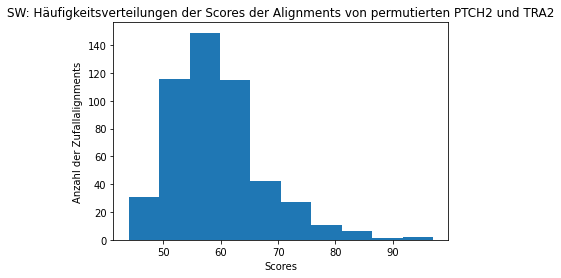

In [25]:
plt.title("SW: Häufigkeitsverteilungen der Scores der Alignments von permutierten PTCH2 und TRA2")
plt.xlabel("Scores")
plt.ylabel("Anzahl der Zufallalignments")
plt.hist(sc_pt2)
plt.show()

In [26]:
print("Originales Score:", needle_pt[2])
print("Wahrscheinlichkeit der besser Scores:",wahrsch(needle_pt[2],sc_pt2))

Originales Score: -162.0
Wahrscheinlichkeit der besser Scores: 1.0


- Permuatierte Eyeless und TRA2

a) Needleman-Wunsch-Algorithmus

In [27]:
sta = timeit.default_timer()
sc_ey = zufall(ey,tra)
end = timeit.default_timer()
print("Time",end -sta)
print(sc_ey)

Time 401.2727970519918
[-651.0, -740.0, -674.0, -727.0, -741.0, -724.0, -678.0, -708.0, -675.0, -693.0, -721.0, -710.0, -726.0, -685.0, -682.0, -712.0, -704.0, -701.0, -727.0, -706.0, -694.0, -720.0, -766.0, -732.0, -749.0, -685.0, -739.0, -721.0, -715.0, -710.0, -754.0, -735.0, -727.0, -675.0, -712.0, -686.0, -699.0, -702.0, -699.0, -661.0, -671.0, -717.0, -748.0, -745.0, -716.0, -731.0, -682.0, -723.0, -709.0, -705.0, -655.0, -696.0, -717.0, -715.0, -694.0, -708.0, -709.0, -774.0, -766.0, -741.0, -691.0, -690.0, -665.0, -719.0, -740.0, -648.0, -702.0, -682.0, -692.0, -695.0, -658.0, -677.0, -668.0, -656.0, -717.0, -661.0, -702.0, -732.0, -713.0, -708.0, -696.0, -735.0, -720.0, -724.0, -706.0, -694.0, -751.0, -695.0, -704.0, -682.0, -712.0, -687.0, -698.0, -681.0, -678.0, -699.0, -722.0, -683.0, -699.0, -738.0, -750.0, -722.0, -640.0, -736.0, -730.0, -682.0, -736.0, -715.0, -703.0, -644.0, -663.0, -716.0, -748.0, -667.0, -693.0, -670.0, -708.0, -712.0, -713.0, -702.0, -765.0, -664.0, 

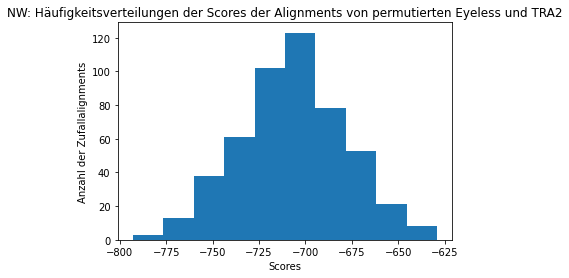

In [28]:
plt.title("NW: Häufigkeitsverteilungen der Scores der Alignments von permutierten Eyeless und TRA2")
plt.xlabel("Scores")
plt.ylabel("Anzahl der Zufallalignments")
plt.hist(sc_ey)
plt.show()

In [29]:
print("Originales Score:",needle_ey[2])
print("Wahrscheinlichkeit der besser Scores:",wahrsch(needle_ey[2],sc_ey))

Originales Score: -699.0
Wahrscheinlichkeit der besser Scores: 0.384


b) Smith-Waterman-Algorithmus

In [30]:
sta = timeit.default_timer()
sc_ey2 = zufall2(ey,tra)
end = timeit.default_timer()
print("Time",end -sta)
print(sc_ey2)

Time 422.1880900580145
[46.0, 66.0, 49.0, 44.0, 60.0, 58.0, 51.0, 44.0, 49.0, 48.0, 64.0, 57.0, 83.0, 49.0, 65.0, 48.0, 63.0, 57.0, 62.0, 54.0, 48.0, 52.0, 53.0, 46.0, 45.0, 44.0, 44.0, 50.0, 56.0, 56.0, 54.0, 62.0, 46.0, 54.0, 44.0, 55.0, 55.0, 52.0, 56.0, 56.0, 53.0, 54.0, 52.0, 53.0, 51.0, 63.0, 48.0, 44.0, 48.0, 51.0, 47.0, 49.0, 55.0, 60.0, 48.0, 49.0, 47.0, 51.0, 44.0, 52.0, 54.0, 49.0, 52.0, 52.0, 44.0, 50.0, 57.0, 56.0, 51.0, 58.0, 59.0, 46.0, 53.0, 52.0, 49.0, 55.0, 55.0, 52.0, 53.0, 50.0, 65.0, 60.0, 60.0, 48.0, 51.0, 68.0, 51.0, 48.0, 46.0, 56.0, 44.0, 49.0, 60.0, 53.0, 46.0, 48.0, 47.0, 44.0, 45.0, 50.0, 50.0, 63.0, 53.0, 43.0, 53.0, 54.0, 55.0, 44.0, 50.0, 45.0, 49.0, 56.0, 58.0, 53.0, 57.0, 54.0, 54.0, 55.0, 52.0, 60.0, 55.0, 59.0, 66.0, 52.0, 54.0, 46.0, 59.0, 50.0, 60.0, 54.0, 50.0, 59.0, 47.0, 46.0, 65.0, 48.0, 51.0, 53.0, 48.0, 42.0, 54.0, 56.0, 46.0, 51.0, 52.0, 52.0, 51.0, 48.0, 61.0, 43.0, 76.0, 54.0, 57.0, 71.0, 52.0, 49.0, 45.0, 54.0, 54.0, 59.0, 47.0, 48.0, 48.0

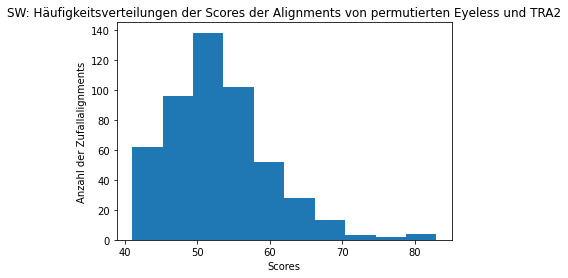

In [31]:
plt.title("SW: Häufigkeitsverteilungen der Scores der Alignments von permutierten Eyeless und TRA2")
plt.xlabel("Scores")
plt.ylabel("Anzahl der Zufallalignments")
plt.hist(sc_ey2)
plt.show()

In [33]:
print("Originales Score:",needle_ey[2])
print("Wahrscheinlichkeit der besser Scores:",wahrsch(needle_ey[2],sc_ey2))

Originales Score: -699.0
Wahrscheinlichkeit der besser Scores: 1.0


**Einfluss von Alignmentparametern**

Substitutionsmatrix erstellen anhand der verschiedenen Match und Missmatch

In [34]:
def sub_nukl(match,missmatch):
    sub_nu = dict()
    nu = ["A","T","G","C"]
    for n1 in nu:
        for n2 in nu:
            if n2 == n1: sub_nu[n1+n2] = match
            else: sub_nu[n1+n2] = missmatch
    return sub_nu

rRNA-Sequenzen aus File

In [35]:
ls5 = seq(open("rRNASeq.fasta","r"))
seq1 = ls5[1]
seq2 = ls5[3]

Smith-Waterman-Algorithmus mit verschiedenen Match- und Missmatch-Werten

Die Länge der Alignments mit unterschiedlichen Werte:


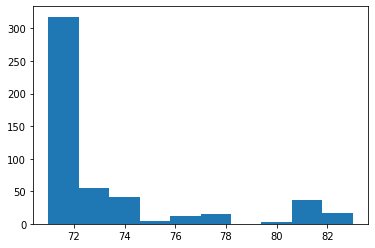

Die Sequenzidentität der Aligments:


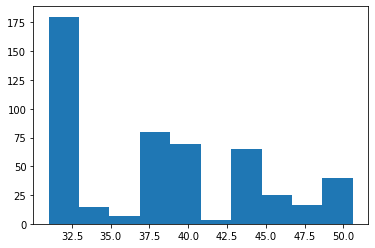

In [36]:
import matplotlib.pyplot as plt

i = 500
ll_alig = []
l_id = []
while i > 0:
    gap = - rd.randint(0,8)
    match = rd.randint(0,8) + 1
    missmatch = rd.randint(gap+1,match)
    
    sm = smith_waterman(seq1,seq2,sub_nukl(match,missmatch),gap)
    tb_sm = get_traceback(seq1,seq2,sm[1])
    ll_alig.append(len(tb_sm[0]))
    l_id.append(identisch(tb_sm[0],tb_sm[1]))
    
    i -= 1
    
print("Die Länge der Alignments mit unterschiedlichen Werte:")
plt.hist(ll_alig)
plt.show()
print("Die Sequenzidentität der Aligments:")
plt.hist(l_id)
plt.show()